## Загрузка данных

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Задание 1

## График стоимости жилья

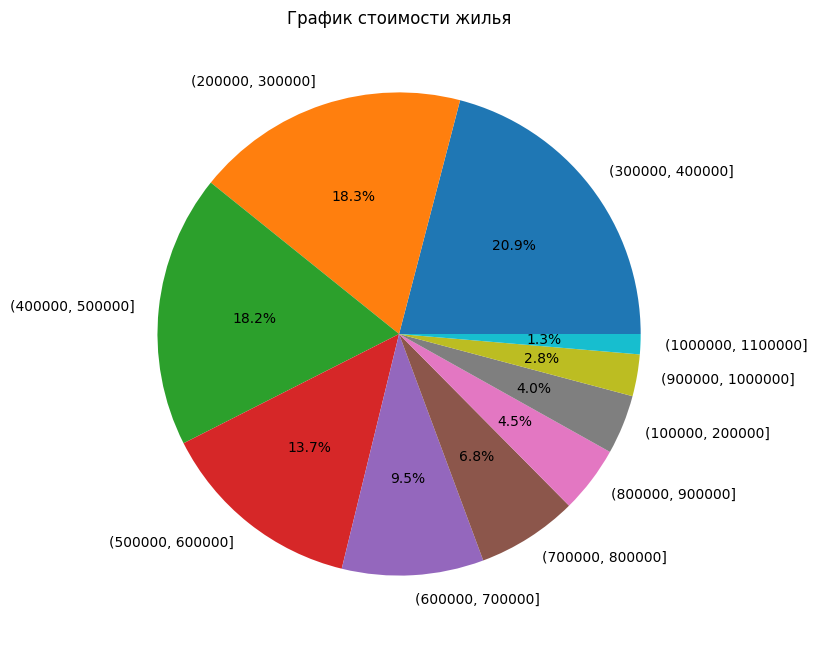

In [3]:
ranges = [i for i in range(0, int(data['price'].max()), 100000)]
prices = data['price'].groupby(pd.cut(data['price'], ranges)).count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')

plt.pie(prices.values, labels=prices.keys(), autopct='%1.1f%%')
plt.title('График стоимости жилья')
plt.show()

На графике показан топ-10 диапазонов стоимости жилья (интервал 100000)  
На графике видно, что больше всего жилья в отрезке от 300к до 400к  
Также хочется отметить, что в диапазонах 200-300к и 400-500к находится примерно одинаковое количество жилья, которое чуть меньше, чем количество в наиболее популярном диапазоне   
Отрезки 500-600к и 600-700к чуть менее распространены  
Остальные отрезки имеют значительно меньшее распространение 

## Распределение жилой квадратуры

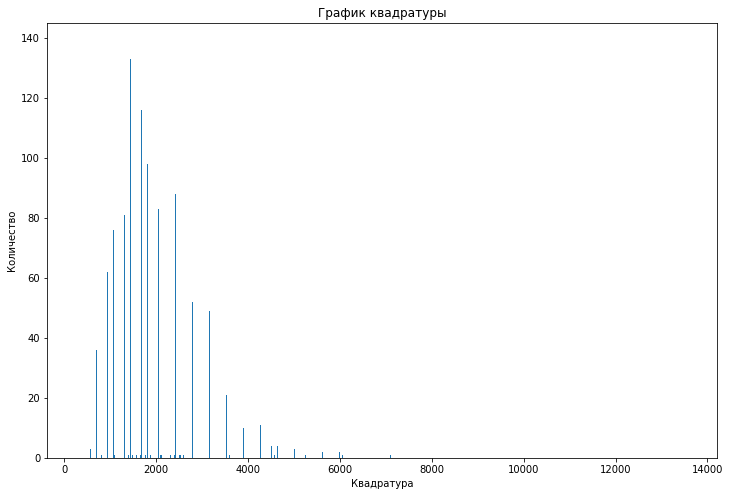

1300    138
1400    135
1440    133
1800    129
1660    129
Name: sqft_living, dtype: int64

In [4]:
sqft_data = data['sqft_living'].value_counts()

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.bar(sqft_data.keys(), sqft_data.values)
plt.title('График квадратуры')

plt.xlabel('Квадратура')
plt.ylabel('Количество')

plt.show()
sqft_data.head()

Если судить по графику, то можно предположить, что данное распределение является гамма-распределением  
Наибольшее количество квартир находится в промежутке от 1500 до 2500

## Распределение года постройки

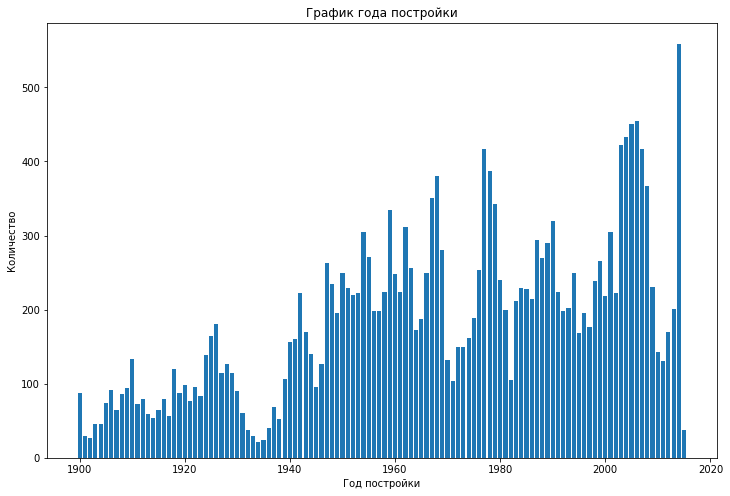

2014    559
2006    454
2005    450
2004    433
2003    422
Name: yr_built, dtype: int64

In [26]:
year_data = data['yr_built'].value_counts()

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.bar(year_data.keys(), year_data.values)
plt.title('График года постройки')

plt.xlabel('Год постройки')
plt.ylabel('Количество')

plt.show()
year_data.head()

Анализируя график, можно отметить, что наибольшее количество жилья было построено в промежутке с 2000 по 2010 год  
Также строительные бумы меньшей интенсивности наблюдались в районе 1970 и 1980 годов
Рекорд по строительству - 2014 год, было построено 559 единиц жилья

# Задание 2

## Распределение домов от наличия вида на набережную

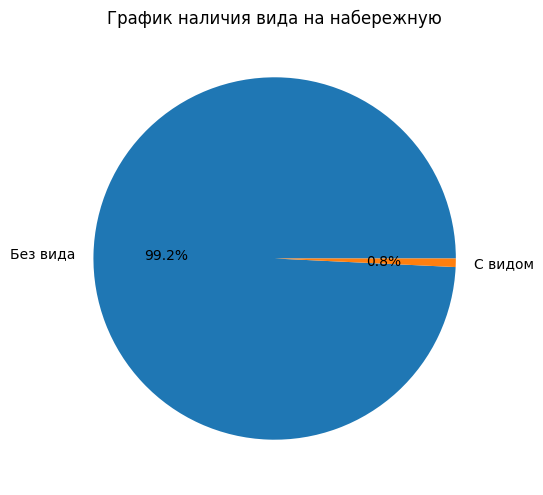

0    21450
1      163
Name: waterfront, dtype: int64

In [27]:
waterfront_data = data['waterfront'].value_counts()
labels = ['Без вида', 'С видом']

plt.figure(figsize=(10,6), dpi=100, facecolor='w', edgecolor='k')

plt.pie(waterfront_data, labels=labels, autopct='%1.1f%%')
plt.title('График наличия вида на набережную')
plt.show()
waterfront_data

Судя по графику, действительно большинство квартир не имеют вид на набережную  
Только 0.8% жилья имеет вид на набережную, это 163 единицы  
Таким образом, наличие вида на воду является весьма редким признаком жилья

## Этажи домов

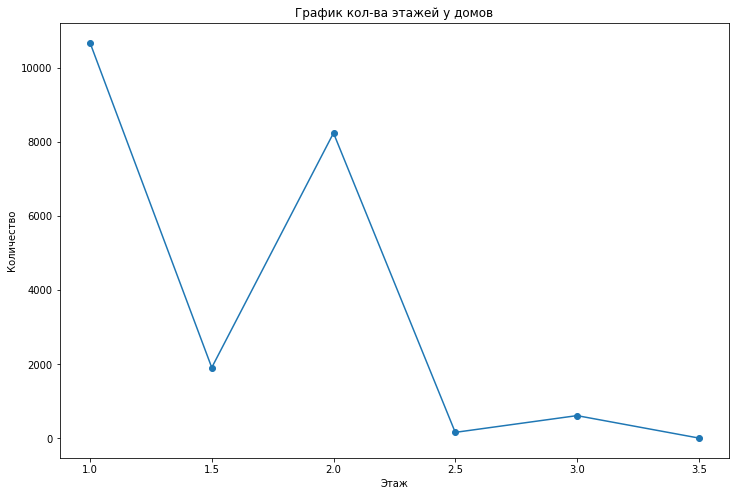

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

In [28]:
floor_data = data['floors'].value_counts().sort_index()

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.scatter(floor_data.keys(), floor_data.values)
plt.plot(floor_data.keys(), floor_data.values)
plt.title('График кол-ва этажей у домов')

plt.xlabel('Этаж')
plt.ylabel('Количество')

plt.show()
floor_data

## Состояние домов

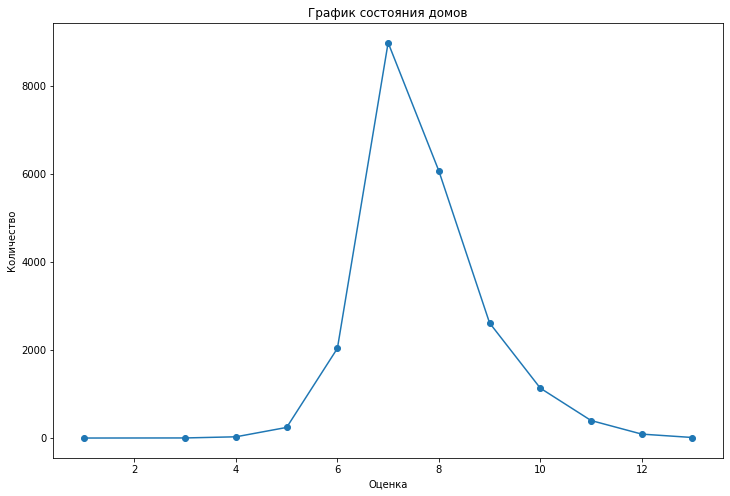

1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64

In [29]:
grade_data = data['grade'].value_counts().sort_index()

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.scatter(grade_data.keys(), grade_data.values)
plt.plot(grade_data.keys(), grade_data.values)
plt.title('График состояния домов')

plt.xlabel('Оценка')
plt.ylabel('Количество')

plt.show()
grade_data

По графику видно, что большинство домов имеют оценку от 6 до 9  
Также по графику можно предположить, что такое распределение является нормальным

# Задание 3

## Зависимость цены от жилой площади

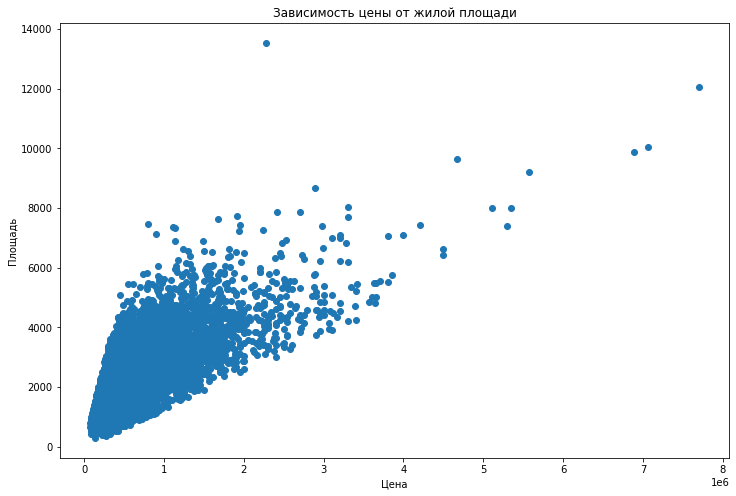

In [30]:
sort_by_price = data.sort_values('price')

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.scatter(sort_by_price['price'], sort_by_price['sqft_living'])
plt.title('Зависимость цены от жилой площади')

plt.xlabel('Цена')
plt.ylabel('Площадь')

plt.show()

На графике можно заметить, что отношение стоимости жилья и жилой площади прямое
Можно сделать вывод о том, что зависимость стоимости жилья от жилой площади прямая

## Зависимость цены от кол-ва комнат

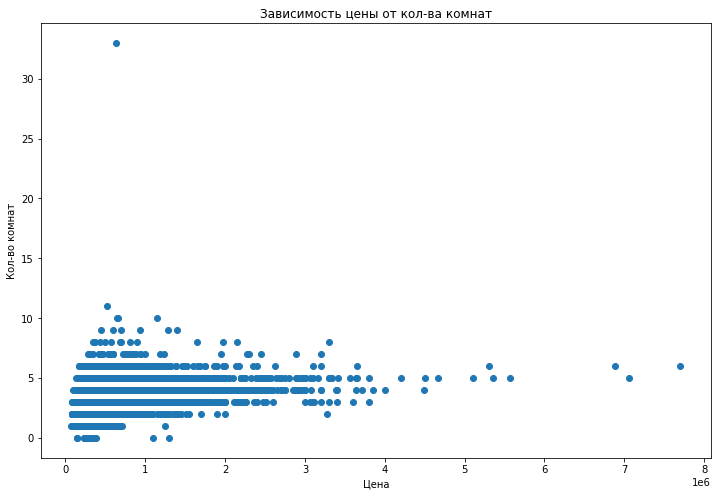

In [31]:
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.scatter(sort_by_price['price'], sort_by_price['bedrooms'])
plt.title('Зависимость цены от кол-ва комнат')

plt.xlabel('Цена')
plt.ylabel('Кол-во комнат')

plt.show()

Судя по графику, некоторая зависимость цены от количества комнат есть, но она не очень большая, что позволяет сделать вывод о том, что в данном датасете цена зависит от количества комнат не сильно и это не является решающим фактором

## Зависимость цены от общей площади

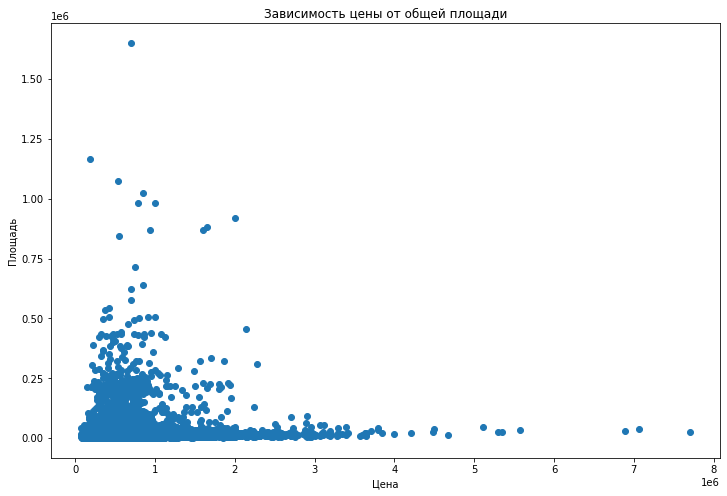

In [32]:
plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.scatter(sort_by_price['price'], sort_by_price['sqft_lot'])
plt.title('Зависимость цены от общей площади')

plt.xlabel('Цена')
plt.ylabel('Площадь')

plt.show()

Если смотреть на график, то зависимость цены от общей площади не прослеживается  
Также видно, что жильё с максимальной площадью в принципе имеет относительно низкую цену

## Средняя цена квартир в зависимости от наличия вида на воду

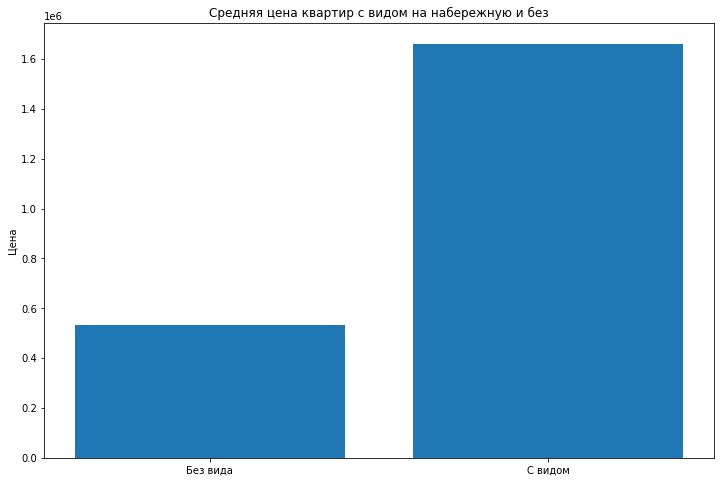

In [33]:
waterfront_data = data['waterfront'].value_counts()

sum0 = 0
sum1 = 0

for index, row in data.iterrows():
  if row['waterfront'] == 0:
    sum0 += row['price']
  else:
    sum1 += row['price']

means = [sum0 / waterfront_data[0], sum1 / waterfront_data[1]]
labels = ['Без вида', 'С видом']

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.bar(labels, means)
plt.title('Средняя цена квартир с видом на набережную и без')

plt.ylabel('Цена')

plt.show()

## Средняя цена квартир в зависимости от года постройки

Рассматривая график, хочется отметить, что средняя цена жилья с видом на воду гораздо выше, чем цена жилья без вида. Разница примерно в 3 раза
Можно сделать вывод о том, что вид на воду сильно влияет на конечную стоимость недвижимости

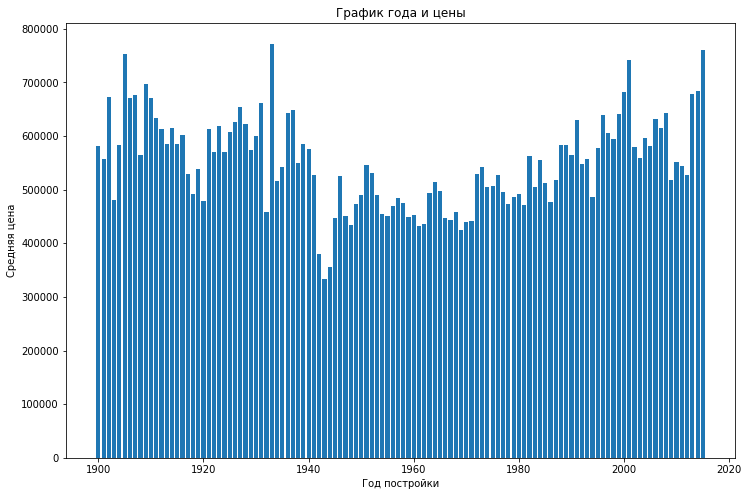

In [34]:
by_year = data.groupby('yr_built')['price'].mean()

plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
plt.bar(by_year.keys(), by_year.values)
plt.title('График года и цены')

plt.xlabel('Год постройки')
plt.ylabel('Средняя цена')

plt.show()

Рассматривая график, не наблюдается сильной зависимости средней цены от года постройки, но можно сделать некоторые выводы:
- Сильно ценится современное жильё, а также жильё 1906 и 1933 года
- Самое недорогое жильё было построено в 1943 году
- Жильё в периоде от 1900 до 1940 ценится больше, чем жильё в периоде от 1940 до 1970

## Выводы

Рассматривая результаты анализа, мне бы хотелось отметить, что из рассмотренных характеристик на конечную цену жилья более всего влияют факторы размера жилой площади и наличия вида на воду  
Зависимость от количества комнат была выявлена слабая. Зависимость цены от общей площади не была выявлена в принципе. Также нет сильной зависимости от года постройки, но были замечены некоторые тенденции в виде спроса на современное и довоенное жильё